<a href="https://colab.research.google.com/github/andromeda313/Pneumonia_Prediction/blob/main/Pnevmoniya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install fastai==2.5.3

In [9]:
!pip install pandas
!pip install  numpy
!pip install awscli
!pip install  urllib3
!pip install  tqdm
!pip install  opencv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [1]:
import torch
import fastai
from fastai.vision.all import *
from ipywidgets import widgets

fastai.__version__, torch.__version__

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


('2.7.7', '1.12.0+cu113')

In [2]:
url = '/content/drive/MyDrive/ANDROMEDA_Drive/RepeateDataScience/ForSertificate/3Pnevmoniya/pnevmoniya/train/'
path = Path(url)
fls = get_image_files(path)
fls

(#5216) [Path('/content/drive/MyDrive/ANDROMEDA_Drive/RepeateDataScience/ForSertificate/3Pnevmoniya/pnevmoniya/train/NORMAL/IM-0515-0001.jpeg'),Path('/content/drive/MyDrive/ANDROMEDA_Drive/RepeateDataScience/ForSertificate/3Pnevmoniya/pnevmoniya/train/NORMAL/IM-0509-0001-0002.jpeg'),Path('/content/drive/MyDrive/ANDROMEDA_Drive/RepeateDataScience/ForSertificate/3Pnevmoniya/pnevmoniya/train/NORMAL/IM-0527-0001.jpeg'),Path('/content/drive/MyDrive/ANDROMEDA_Drive/RepeateDataScience/ForSertificate/3Pnevmoniya/pnevmoniya/train/NORMAL/IM-0510-0001.jpeg'),Path('/content/drive/MyDrive/ANDROMEDA_Drive/RepeateDataScience/ForSertificate/3Pnevmoniya/pnevmoniya/train/NORMAL/IM-0521-0001.jpeg'),Path('/content/drive/MyDrive/ANDROMEDA_Drive/RepeateDataScience/ForSertificate/3Pnevmoniya/pnevmoniya/train/NORMAL/IM-0511-0001.jpeg'),Path('/content/drive/MyDrive/ANDROMEDA_Drive/RepeateDataScience/ForSertificate/3Pnevmoniya/pnevmoniya/train/NORMAL/IM-0523-0001-0003.jpeg'),Path('/content/drive/MyDrive/ANDROME

In [3]:
pnevmoniya = DataBlock(
    blocks=(ImageBlock, 
            CategoryBlock),
    get_items = get_image_files, 
    splitter = RandomSplitter(
        valid_pct=0.2,
        seed=42),
        get_y = parent_label,
        item_tfms=Resize(224))

dls = pnevmoniya.dataloaders(path)

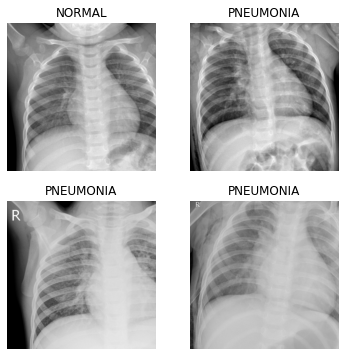

In [5]:
dls.train.show_batch(max_n=4,nrows=2)

In [4]:
learn = cnn_learner(dls, resnet34, metrics = accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.492163,0.153642,0.949185,07:51


epoch,train_loss,valid_loss,accuracy,time
0,0.162779,0.091956,0.967402,02:11
1,0.108753,0.042753,0.983701,02:12
2,0.054592,0.019948,0.993289,02:14
3,0.028893,0.020872,0.993289,02:15


In [5]:
interp = ClassificationInterpretation.from_learner(learn)
conf_mat = interp.confusion_matrix()

In [6]:
conf_mat

array([[267,   2],
       [  5, 769]])

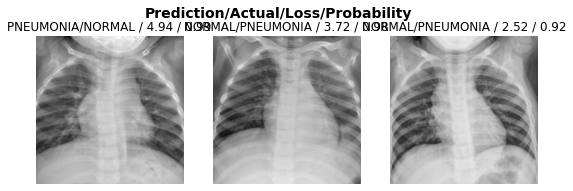

In [ ]:
interp.plot_top_losses(3, nrows = 1)

#Alohida tekshirish

In [7]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

In [8]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f'Bashorat : {pred}')
print(f'Ehtimollik: {probs[pred_id]*100:.2f}')


Bashorat : PNEUMONIA
Ehtimollik: 99.79


#Modelni saqlab qo'yish

In [9]:
model_path = "/content/drive/MyDrive/ANDROMEDA_Drive/RepeateDataScience/ForSertificate/3Pnevmoniya/model.pkl"
learn.export(model_path)

#Test ma'lumotlari bilan shug'ullanish

In [10]:
model = load_learner(model_path)

In [11]:
import os
import pandas as pd
results  = pd.DataFrame(columns=['id', 'labels'])

folder ='/content/drive/MyDrive/ANDROMEDA_Drive/RepeateDataScience/ForSertificate/3Pnevmoniya/pnevmoniya/test/'
images = os.listdir(folder)

for (i, image) in enumerate(images):
    #print(f"{folder}{image} {i+1}/{len(images)}")
    pred, pred_id, probs = model.predict(f'{folder}{image}')
    print(f'Bashorat : {pred} Ehtimollik: {probs[pred_id]*100:.2f}')
    
    results = results.append({'id':image, 'labels': pred}, ignore_index=True)


Bashorat : PNEUMONIA Ehtimollik: 99.93


Bashorat : PNEUMONIA Ehtimollik: 99.88


Bashorat : PNEUMONIA Ehtimollik: 99.89


Bashorat : PNEUMONIA Ehtimollik: 97.59


Bashorat : PNEUMONIA Ehtimollik: 100.00


Bashorat : PNEUMONIA Ehtimollik: 99.46


Bashorat : PNEUMONIA Ehtimollik: 99.99


Bashorat : PNEUMONIA Ehtimollik: 99.97


Bashorat : PNEUMONIA Ehtimollik: 100.00


Bashorat : PNEUMONIA Ehtimollik: 99.31


Bashorat : PNEUMONIA Ehtimollik: 100.00


Bashorat : PNEUMONIA Ehtimollik: 99.98


Bashorat : PNEUMONIA Ehtimollik: 99.98


Bashorat : PNEUMONIA Ehtimollik: 99.99


Bashorat : PNEUMONIA Ehtimollik: 99.94


Bashorat : PNEUMONIA Ehtimollik: 99.99


Bashorat : PNEUMONIA Ehtimollik: 99.97


Bashorat : PNEUMONIA Ehtimollik: 100.00


Bashorat : PNEUMONIA Ehtimollik: 98.28


Bashorat : NORMAL Ehtimollik: 72.98


Bashorat : PNEUMONIA Ehtimollik: 99.89


Bashorat : PNEUMONIA Ehtimollik: 99.99


Bashorat : PNEUMONIA Ehtimollik: 99.99


Bashorat : PNEUMONIA Ehtimollik: 73.28


Bashorat : NORMAL Ehtimollik: 99.79


Bashorat : PNEUMONIA Ehtimollik: 99.99


Bashorat : PNEUMONIA Ehtimollik: 100.00


Bashorat : PNEUMONIA Ehtimollik: 99.99


Bashorat : NORMAL Ehtimollik: 94.45


In [13]:
results.head()

,id,labels
0,test_img_10024.jpeg,NORMAL
1,test_img_10058.jpeg,NORMAL
2,test_img_10047.jpeg,NORMAL
3,test_img_10032.jpeg,PNEUMONIA
4,test_img_10007.jpeg,NORMAL


In [14]:
results_load = results.replace({'NORMAL':0, 'PNEUMONIA':1})
results_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      624 non-null    object
 1   labels  624 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.9+ KB


In [15]:
results_load.to_csv('/content/drive/MyDrive/ANDROMEDA_Drive/RepeateDataScience/ForSertificate/3Pnevmoniya/results_load.csv', index=False)